In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\mk744\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('Test set.csv')

In [3]:
df

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female
...,...,...,...
200,155.090314,77.248911,Female
201,149.175907,93.231692,Male
202,168.030874,63.640623,Female
203,172.608090,55.189983,Male


In [4]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sex', axis=1),
                                                   df['Sex'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((143, 2), (62, 2))

In [5]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameter
scaler.fit(X_train)
# scaler is an object to calculate mean and std
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
scaler.mean_

array([161.17521772,  70.64934994])

In [7]:
X_train

,Height,Weight
40,135.762519,39.989730
60,147.222177,76.707333
56,155.754493,86.949847
101,150.581321,60.716247
86,180.742037,103.390565
...,...,...
67,161.390710,75.691175
192,149.094624,61.613225
117,178.144488,92.308980
47,154.207922,64.104378


In [8]:
X_train_scaled

array([[-1.75575802e+00, -1.92077997e+00],
       [-9.64012643e-01,  3.79523701e-01],
       [-3.74516737e-01,  1.02120211e+00],
       [-7.31930108e-01, -6.22294286e-01],
       [ 1.35186746e+00,  2.05118889e+00],
       [ 1.52680028e+00,  8.07515950e-01],
       [ 1.20456494e-01,  4.17096662e-01],
       [-9.64935448e-01,  7.92728809e-02],
       [ 1.36806505e+00,  1.56279456e+00],
       [ 1.22423131e+00,  4.76268771e-01],
       [ 2.13764191e-01, -5.87878633e-01],
       [ 1.50375851e-02, -1.21875310e+00],
       [-2.09928859e-02, -1.31554374e+00],
       [-9.16731003e-01, -5.89712046e-01],
       [ 1.01177989e+00,  3.15655216e-01],
       [ 1.80761207e-01,  7.53149721e-01],
       [ 4.78171014e-01, -7.05307984e-02],
       [ 1.03445766e-01,  4.58293834e-01],
       [ 1.91219858e+00, -7.30208624e-02],
       [ 4.19972851e-02, -4.71820623e-01],
       [ 6.65957059e-01,  1.39191874e-01],
       [-5.91034363e-02, -8.22043289e-01],
       [-1.34923867e+00, -5.95984850e-01],
       [ 1.

In [9]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [10]:
scaler.mean_

array([161.17521772,  70.64934994])

In [11]:
X_train

,Height,Weight
40,135.762519,39.989730
60,147.222177,76.707333
56,155.754493,86.949847
101,150.581321,60.716247
86,180.742037,103.390565
...,...,...
67,161.390710,75.691175
192,149.094624,61.613225
117,178.144488,92.308980
47,154.207922,64.104378


In [12]:
X_train_scaled

,Height,Weight
0,-1.755758,-1.920780
1,-0.964013,0.379524
2,-0.374517,1.021202
3,-0.731930,-0.622294
4,1.351867,2.051189
...,...,...
138,0.014888,0.315863
139,-0.834646,-0.566100
140,1.172403,1.356944
141,-0.481369,-0.410033


In [13]:
# before feature scaling the value
# of mean of age is 37.9 and 
# mean of Estimated Salary is 69897.1
# and std is of Age is 10.2 and std of EstimatedSalary is 34641.2
np.round(X_train.describe(), 1)

,Height,Weight
count,143.0,143.0
mean,161.2,70.6
std,14.5,16.0
min,130.8,34.7
25%,149.0,59.8
50%,161.5,70.1
75%,172.7,77.9
max,191.2,129.4


In [14]:
# after feature scaling the mean
# of Age is 0.0 and mean of EstimatedSalary is 0.0
# and std is of Age is 1.0 and std of EstimatedSalary is 1.0
np.round(X_train_scaled.describe(), 1)

,Height,Weight
count,143.0,143.0
mean,-0.0,0.0
std,1.0,1.0
min,-2.1,-2.3
25%,-0.8,-0.7
50%,0.0,-0.0
75%,0.8,0.5
max,2.1,3.7


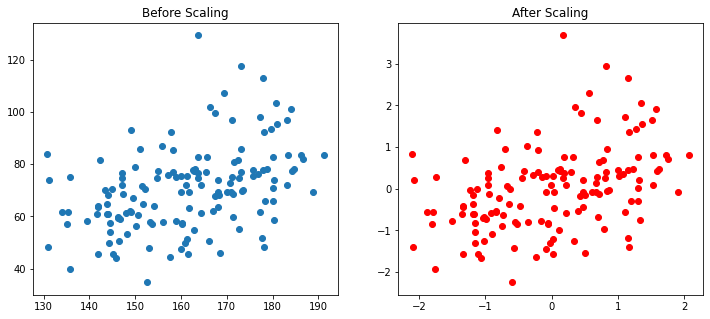

In [15]:
# Effect of Scaling
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))
ax1.scatter(X_train['Height'], X_train['Weight'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Height'], X_train_scaled['Weight'], color = 'red')
ax2.set_title('After Scaling')
plt.show()

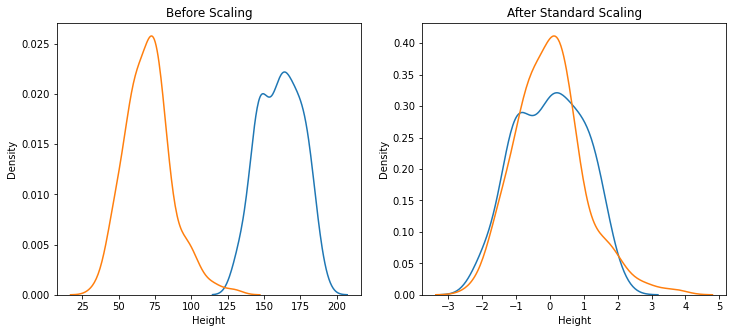

In [16]:
# to show what is the benifits of scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Height'], ax = ax1)
sns.kdeplot(X_train['Weight'], ax = ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Height'], ax = ax2)
sns.kdeplot(X_train_scaled['Weight'], ax = ax2)
plt.show()

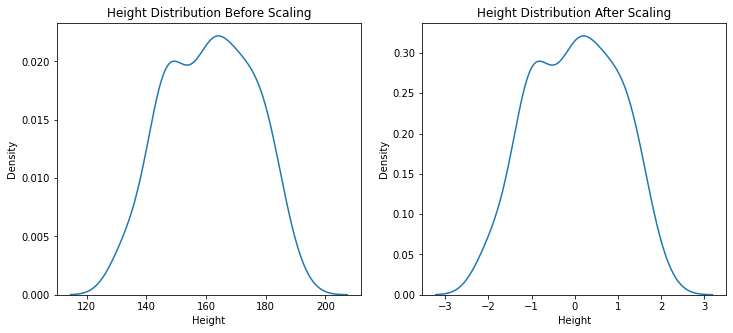

In [17]:
# Comparision of Distributions

# Before scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('Height Distribution Before Scaling')
sns.kdeplot(X_train['Height'], ax= ax1)

# After scaling
ax2.set_title('Height Distribution After Scaling')
sns.kdeplot(X_train_scaled['Height'], ax = ax2)
plt.show()

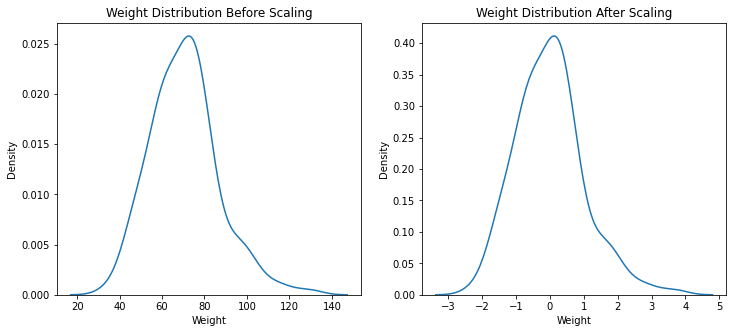

In [18]:
# Comparision of Distributions

# Before scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('Weight Distribution Before Scaling')
sns.kdeplot(X_train['Weight'], ax= ax1)

# After scaling
ax2.set_title('Weight Distribution After Scaling')
sns.kdeplot(X_train_scaled['Weight'], ax = ax2)
plt.show()

In [19]:
# Why scaling is important?
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [20]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [22]:
# This shows scaling increases the accuracy
from sklearn.metrics import accuracy_score
print('Actual', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.9032258064516129
Scaled 0.9032258064516129


In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [24]:
dt.fit(X_train , y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [25]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [26]:
print('Actual', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.7741935483870968
Scaled 0.7741935483870968


In [27]:
df.describe()

,Height,Weight
count,205.000000,205.000000
mean,160.874125,69.927028
std,15.171040,15.462396
min,123.007006,34.726666
25%,148.942667,58.583137
50%,161.749388,69.544469
75%,172.608090,77.964667
max,199.282251,129.410122
